#### Titanic dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
%matplotlib inline 

In [20]:
df= pd.read_csv('titanic_train.csv')

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.shape

(891, 12)

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [25]:
df.cabin_null.mean()*100

77.10437710437711

<AxesSubplot:xlabel='cabin_null', ylabel='count'>

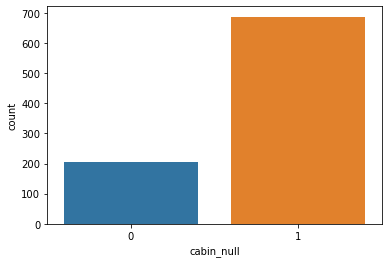

In [26]:
sns.countplot(x='cabin_null',data = df)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [30]:
df.groupby('Survived')['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [31]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [36]:
df.groupby(['Survived','Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  cabin_null  
Survived Sex                                  
0        female      6        81          81  
         male       62       468         468  
1        female     91       231         233  
         male       45       109         109

<AxesSubplot:xlabel='Survived', ylabel='count'>

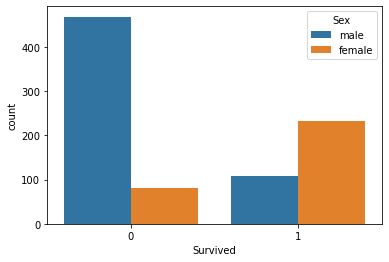

In [35]:
sns.countplot(x='Survived',hue = 'Sex',data = df)

C:\Users\Prakash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

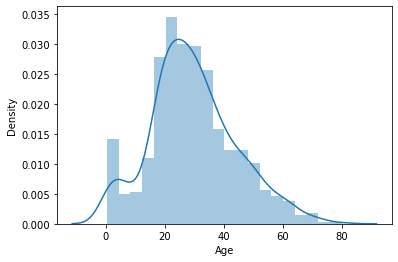

In [34]:
sns.distplot(a=df['Age'])

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [38]:
df.Age.nunique()

88

In [39]:
df.Age.sort_values().head(20)

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
831    0.83
305    0.92
827    1.00
381    1.00
164    1.00
183    1.00
386    1.00
172    1.00
788    1.00
642    2.00
7      2.00
530    2.00
297    2.00
824    2.00
205    2.00
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

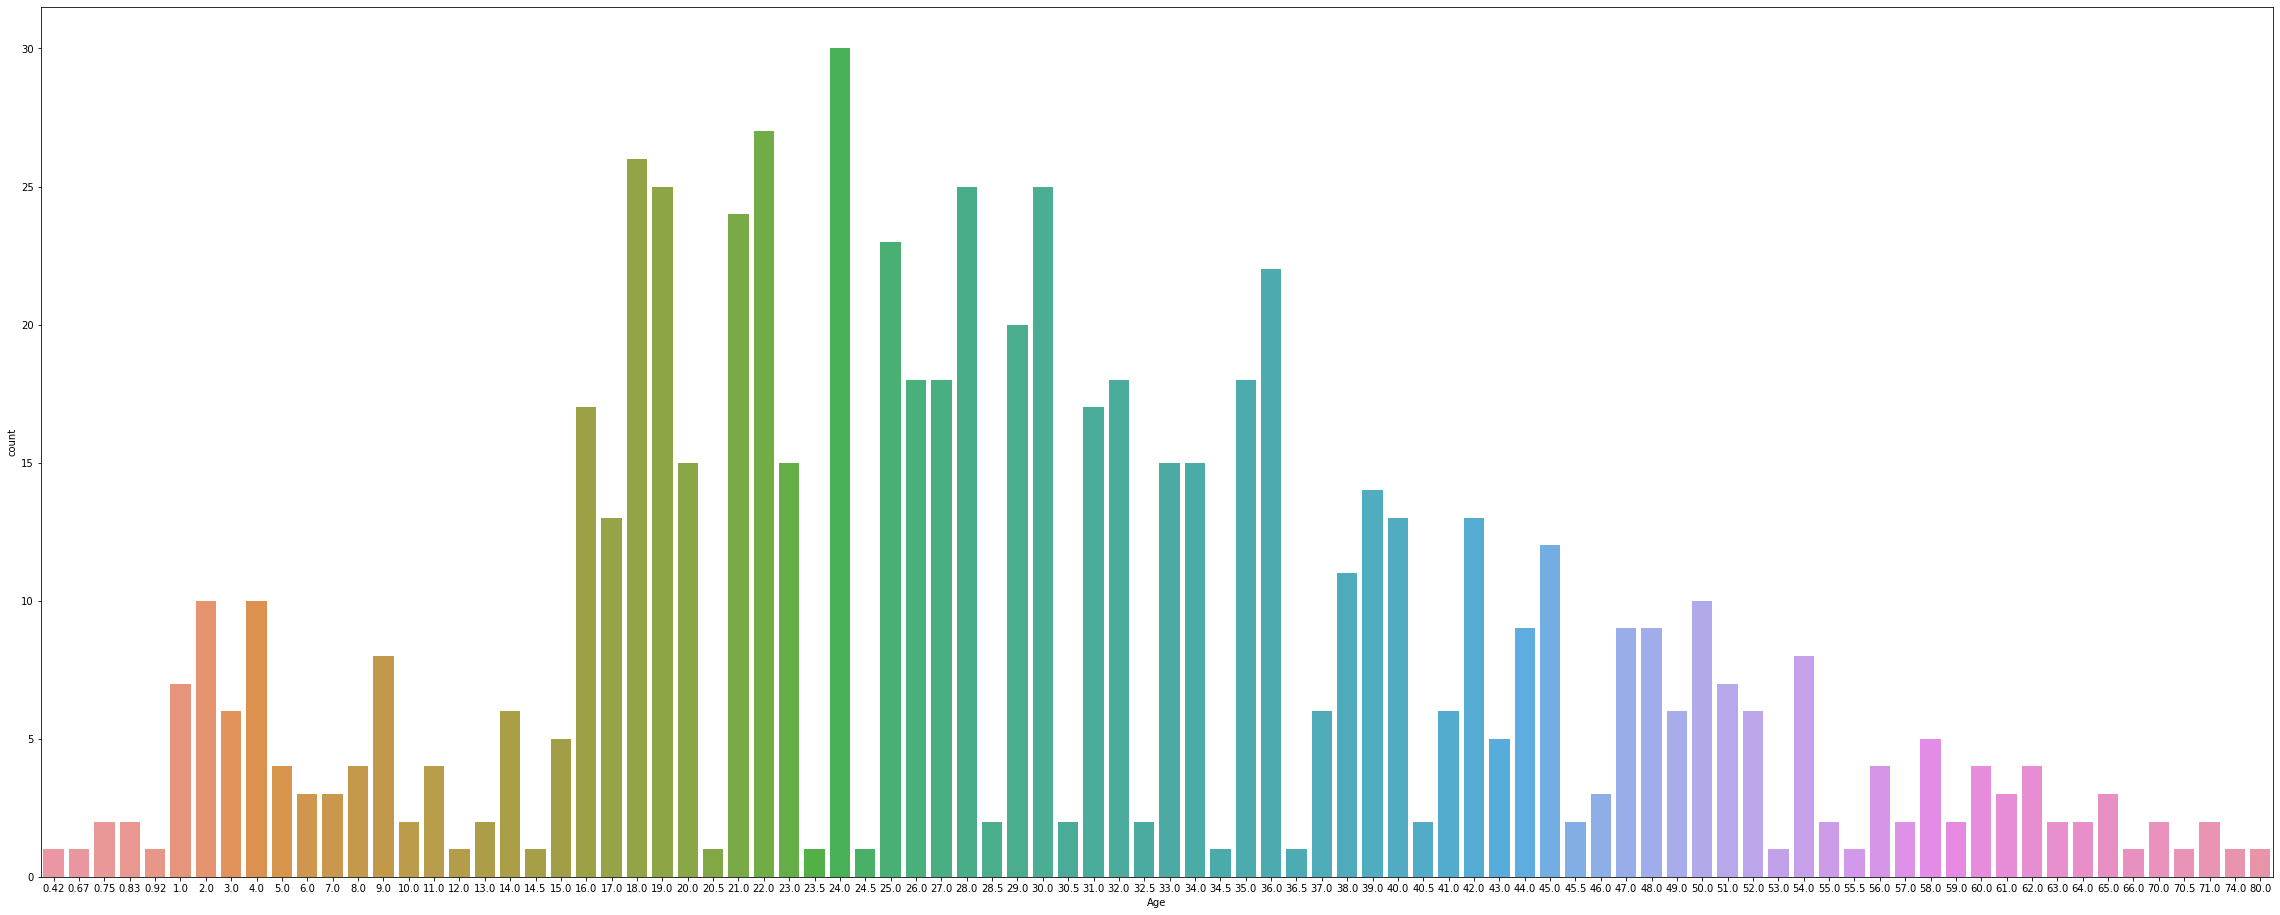

In [40]:
plt.figure(figsize=(40,16))
sns.countplot(x='Age',data=df)

In [20]:
df.groupby(['Sex','Age'])['Survived'].count()

Sex     Age  
female  0.75     2
        1.00     2
        2.00     6
        3.00     2
        4.00     5
                ..
male    70.00    2
        70.50    1
        71.00    2
        74.00    1
        80.00    1
Name: Survived, Length: 145, dtype: int64

In [21]:
df.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [22]:
df.groupby('Survived')['SibSp'].mean()

Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64

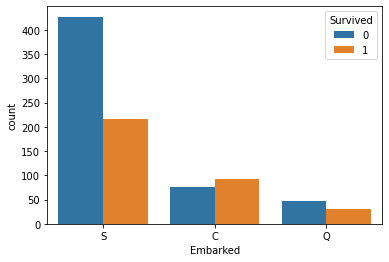

In [23]:
sns.countplot(x='Embarked',data=df,hue='Survived')

In [24]:
df.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [25]:
df.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [26]:
df.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
B102                 0.0000
B94                  0.0000
A36                  0.0000
F G63                7.6500
F G73                7.6500
                     ...   
B58 B60            247.5208
B51 B53 B55        258.6646
B57 B59 B63 B66    262.3750
C23 C25 C27        263.0000
B101               512.3292
Name: Fare, Length: 147, dtype: float64

In [27]:
df.Fare.mean(skipna=False)

32.204207968574636

### All techniques for handling missing values

1. Mean/Median/Mode replacement
2. Random sample imputation                      
3. Capturing NAN values with a new feature     
4. End of Distribution Imputation              
5. Arbitrary imputation                        
6. Frequent Category imputation      

(from 2 onwards all techniques can be used for missing values in categorical features also)

### 1.  Mean/Median/Mode replacement

Since in our dataset the age and cabin nan values are not MCAR(missing completely at random) but we will take only age ,fare and survived for the sake of explanation because mean/ median imputation assumption of MCAR is not satisfied here.

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [42]:
df1=df.copy()[['Survived','Age','Fare']]

In [43]:
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [44]:
df1.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [46]:
def imputing_nan(data,feature,median):
    data[feature+'_median'] = data[feature].fillna(median)
    return 'nan imputation checked'

In [47]:
median = df1.Age.median()
median

28.0

In [48]:
imputing_nan(df1,'Age',median)

'nan imputation checked'

In [49]:
df1.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


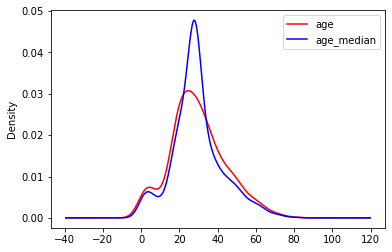

In [36]:
fig=plt.figure()
ax=fig.add_subplot(111)
df1.Age.plot(kind='kde',ax=ax,color='red',label='age')
df1.Age_median.plot(kind='kde',ax=ax,color='blue',label='age_median')
#lines,labels = ax.get_legend_handles_labels()
ax.legend(loc='best')

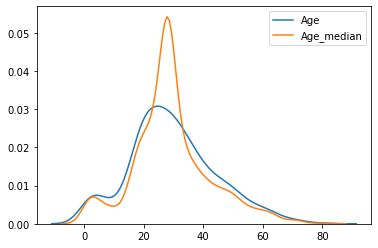

In [37]:
fig=plt.figure()
ax=fig.add_subplot(111)
sns.kdeplot(df1['Age'],ax=ax)
sns.kdeplot(df1['Age_median'],ax=ax)
plt.show()

#### Advantages of mean/median imputation
1. Easy to implement
2. Median and mode imputation are robust to outliers
3. Faster way to obtain the dataset.

#### Disadvantages 
1. Chage or distortion in original variance.
2. Impact correlation.

### 2. Random Sample Imputation

Aim: Removing nan values by taking random obs. from the dataset and uses this value to replace nan values.

Precondition and where to use? :  It assumes that the data is missing completely at random(MCAR)

In [50]:
df2 = df1.iloc[:,:3].copy()

In [51]:
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [54]:
df2.Age.isnull().head(20)

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19     True
Name: Age, dtype: bool

In [56]:
df2.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [59]:
df2.Age.dropna().sample(df2.Age.isnull().sum()).sort_values()

803     0.42
644     0.75
831     0.83
386     1.00
164     1.00
       ...  
545    64.00
456    65.00
672    70.00
745    70.00
493    71.00
Name: Age, Length: 177, dtype: float64

In [53]:
df2.Age.dropna().sample(df2.Age.isnull().sum()).sort_values()

755     0.67
305     0.92
827     1.00
386     1.00
261     3.00
       ...  
879    56.00
11     58.00
232    59.00
570    62.00
96     71.00
Name: Age, Length: 177, dtype: float64

In [42]:
def imputing_nan(df,column,median):
    if median=='random':
        #it will have random values to fill nan values
        random_values = df[column].dropna().sample(df[column].isnull().sum(),random_state=0)
        random_values.index = df[df[column].isnull()].index
        df[column+'_random'] = df[column].fillna(random_values)
        return 'random imputation checked'
    else:
        df[column+'_median'] = df[column].fillna(median)
        return 'median imputation checked'

In [43]:
imputing_nan(df2,'Age','random')

'random imputation checked'

In [44]:
df2.head(),df2.isnull().sum()

(   Survived   Age     Fare  Age_random
 0         0  22.0   7.2500        22.0
 1         1  38.0  71.2833        38.0
 2         1  26.0   7.9250        26.0
 3         1  35.0  53.1000        35.0
 4         0  35.0   8.0500        35.0,
 Survived        0
 Age           177
 Fare            0
 Age_random      0
 dtype: int64)

In [45]:
median = df2.Age.median()
imputing_nan(df2,'Age',median)

'median imputation checked'

In [46]:
df2.head()

,Survived,Age,Fare,Age_random,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


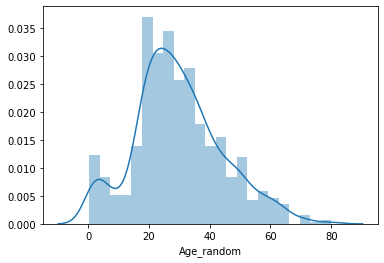

In [47]:
sns.distplot(df2.Age_random)

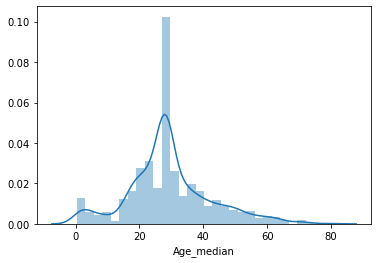

In [48]:
sns.distplot(df2.Age_median)

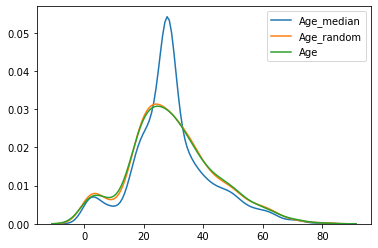

In [49]:
fig = plt.figure()
ax= fig.add_subplot(111)
sns.kdeplot(df2.Age_median,ax=ax)
sns.kdeplot(df2.Age_random,ax=ax)
sns.kdeplot(df2.Age,ax=ax)

#### Advantages:
1. Easy to implement 
2. There is no distortion in the variance

#### Disadvantages
1. In every situation randomness won't work(in competitions mostly this would work but in real world buisness scenario it won't work.).


### 3. Capturing NAN values with a new feature

In [50]:
df3 = df1.iloc[:,:3].copy()

In [51]:
df3['Age_NAN'] = np.where(df3.Age.isnull(),1,0)

In [52]:
df3.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [53]:
 df3.Age.fillna(df3.Age.median(),inplace = True)

In [54]:
df3.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages:
1. Easy to implement.
2. It captures the importance of missing values by putting 1 at nan places.

#### Disadvantages:
1. This method is creating additional features ,and if there are many number of features with missing values this can lead to curse of dimentionality.
  
  

### End of distribution imputation

when to use : When data missing is not completely at random

In [55]:
df4 = df1.iloc[:,:3].copy()

In [56]:
df4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [57]:
df4.Age.mean() + 3*df4.Age.std()  #this value would be imputed at the new feature 

73.27860964406095

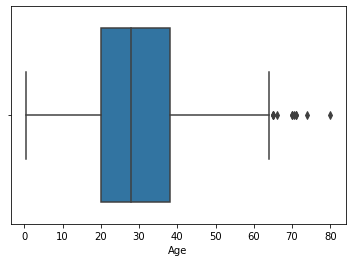

In [58]:
sns.boxplot(df4.Age)

In [59]:
def imputing_nan(df,feature,median):
    df[feature+'_extream'] = df[feature].fillna(df[feature].mean() + 3*df[feature].std())
    df[feature].fillna(median,inplace = True)
    return 'end of diststribution imputation checked'

In [60]:
imputing_nan(df4,'Age',df4.Age.median())

'end of diststribution imputation checked'

In [61]:
df4.head()

,Survived,Age,Fare,Age_extream
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


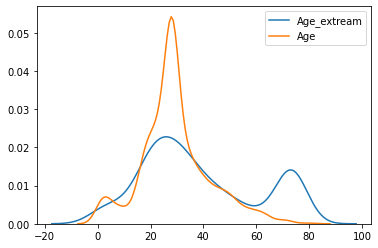

In [62]:
fig = plt.figure()
ax= fig.add_subplot(111)
sns.kdeplot(df4.Age_extream,ax=ax)
sns.kdeplot(df4.Age,ax=ax)

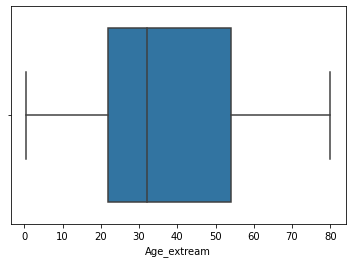

In [63]:
sns.boxplot(df4.Age_extream) # we observe all outliers are also captured

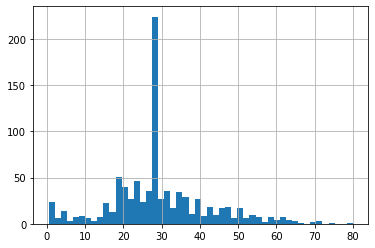

In [64]:
df4.Age.hist(bins=50)

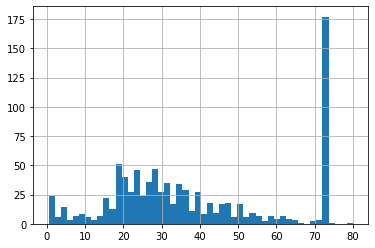

In [65]:
df4.Age_extream.hist(bins=50)     #right skewed

#### Advantages:
1. Easy to implement
2. captures the importance of missing variable

#### Disadvantages:
1. Distort the original distribution of the variable
2. If missingness is not imp. ,it may mask the predictive  power of original variable by distorting its distribution.
3. If number of NA is big , it will mask true outliers in the distribution.
4. If the number of NA is small ,the replaced NA may be considered  an outlier and pre-processed in a subsequent feature eng.

### 5. Arbitrary value Imputation
 This tech was derived from kaggle competitions  
 It consists of replacing Nan by any arbitrary value.

In [66]:
df5 = df1.iloc[:,:3].copy()

In [67]:
df5.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


## How to handle Categorical Missing Value:-

### 6. Frequent category imputation 

For this we will use advanced house price prediction dataset available on kaggle.

For cateorical features with less number of missing values this technique will work well enough and this wont's distort the relationhsip .
But in case when we have greater than 40% (say 45% of a col is missing values) missing values in a partucular cateorical feature then this technique will distort the relationship. We'll use some other technique for that scenario.

In [68]:
df6 = pd.read_csv('house_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [69]:
df6.head(), df6.shape

(  BsmtQual FireplaceQu GarageType  SalePrice
 0       Gd         NaN     Attchd     208500
 1       Gd          TA     Attchd     181500
 2       Gd          TA     Attchd     223500
 3       TA          Gd     Detchd     140000
 4       Gd          TA     Attchd     250000,
 (1460, 4))

In [70]:
df6.isnull().sum(),df6.isnull().mean()*100

(BsmtQual        37
 FireplaceQu    690
 GarageType      81
 SalePrice        0
 dtype: int64,
 BsmtQual        2.534247
 FireplaceQu    47.260274
 GarageType      5.547945
 SalePrice       0.000000
 dtype: float64)

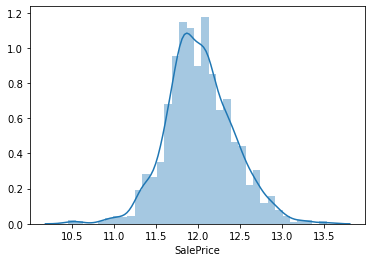

In [71]:
sns.distplot(np.log(df6.SalePrice))

In [72]:
df6.groupby('BsmtQual')['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

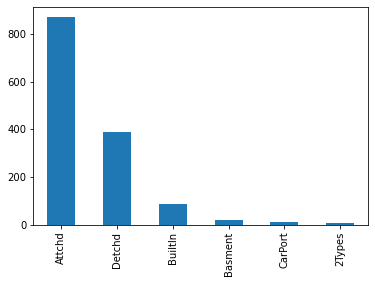

In [73]:
df6.GarageType.value_counts().plot.bar()

In [74]:
df6.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [75]:
def imputing_nan(df,feature):
    freq_cate1 = df[feature].value_counts().index[0]
    freq_cate1_value = df[feature].value_counts().values[0]
    
    freq_cate2 = df[feature].value_counts().index[1]
    freq_cate2_value = df[feature].value_counts().values[1]
    
    if abs(freq_cate1_value-freq_cate2_value)<50:
        nan_indexes = df[df[feature].isnull()][feature].index
        for i in range(len(nan_indexes)):
            if i<=(len(nan_indexes)/2)+2:
                df[feature].loc[nan_indexes[i]]=freq_cate1
            else:
                df[feature].loc[nan_indexes[i]]=freq_cate2
                
        return 'Frequent category imputation checked'    
    else:
        df[feature].fillna(freq_cate1,inplace=True)
        return 'Frequent category imputation checked'

In [76]:
imputing_nan(df6,'GarageType')

'Frequent category imputation checked'

In [77]:
df6.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType       0
SalePrice        0
dtype: int64

In [78]:
imputing_nan(df6,'BsmtQual')

C:\Users\Prakash\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


'Frequent category imputation checked'

In [79]:
df6.isnull().sum()

BsmtQual         0
FireplaceQu    690
GarageType       0
SalePrice        0
dtype: int64

In [80]:
df6.BsmtQual.loc[39],df6.BsmtQual.loc[868],df6.BsmtQual.loc[894],df6.BsmtQual.loc[1000]

('TA', 'TA', 'Gd', 'Gd')

#### Advantages:
1. Easy to implement
2. For small missing categories this is not going to harm the relationship.

#### Disadvantages:
1. Since we are using the most frequent value to replace nan, it may over represent one category.
2. For larger number of nan values , this distorts the relation of the most frequent label.

### 7. Adding a variable to capture NAN.

This method is similar what we did in the continuous variable section , we create new column if nan value is present for a particular column then we put 1 in the new col else 0.

This technique can be used when there are many missing values in a categorical column as it captures the importance of missing values.

In [81]:
df7 = pd.read_csv('house_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [82]:
df7.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [83]:
df7['BsmtQual_new'] = np.where(df7['BsmtQual'].isnull(),1,0)

In [84]:
df7.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [85]:
frequent = df7.BsmtQual.mode()[0]

In [86]:
df7.BsmtQual.fillna(frequent,inplace=True)

#### 7.1. Suppose you have more frequent categories, we just replace it with a new category alltogether.

Most common technique among data scientists.

In [87]:
df7_1 = pd.read_csv('house_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [88]:
def impute_nan(df,variable):
    df[variable+'_newvar'] = np.where(df[variable].isnull(),'Missing',df[variable])
    return 'imputation by new category checked'

In [89]:
for i in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df7_1,i)

In [90]:
df7_1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [91]:
df7_1.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1,inplace=True)

In [92]:
df7_1.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# Handling Categorical Features

Now that we have dealt with all the missing values its time to handle categorical variables and how to encode them through different ways.

### 1. One Hot Encoding

In case of many categories like in mercedes dataset use the top 10 cateories to one hot encode which is very famous technique came out of a KDD cup challenge and this was a winning feature engineering stuff.

In [60]:
df = pd.read_csv('merc_train.csv',usecols= ['X0','X1','X2','X3','X4','X5','X6'])

In [61]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [63]:
freq= df.X1.value_counts().head(10).index

In [64]:
freq

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [96]:
for var in freq:
    df[var] = np.where(df['X1']==var,1,0)

In [97]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


In [98]:
## we can continue this further for all the categories

In [99]:
df= pd.read_csv('titanic_train.csv')

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
import datetime

In [102]:
today = datetime.datetime.today()

In [103]:
today

datetime.datetime(2020, 10, 27, 14, 11, 45, 902688)

In [104]:
days = [today - datetime.timedelta(x) for x in range(0,15)]

In [105]:
data = pd.DataFrame(days,columns=['Day'])

In [106]:
data.head()

,Day
0,2020-10-27 14:11:45.902688
1,2020-10-26 14:11:45.902688
2,2020-10-25 14:11:45.902688
3,2020-10-24 14:11:45.902688
4,2020-10-23 14:11:45.902688


In [107]:
data['Weekday'] = data['Day'].dt.strftime('%A')

In [108]:
data.head(8)

,Day,Weekday
0,2020-10-27 14:11:45.902688,Tuesday
1,2020-10-26 14:11:45.902688,Monday
2,2020-10-25 14:11:45.902688,Sunday
3,2020-10-24 14:11:45.902688,Saturday
4,2020-10-23 14:11:45.902688,Friday
5,2020-10-22 14:11:45.902688,Thursday
6,2020-10-21 14:11:45.902688,Wednesday
7,2020-10-20 14:11:45.902688,Tuesday


In [109]:
day_dict={
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}

In [110]:
data.Weekday = data.Weekday.map(day_dict)

In [111]:
data.head()

,Day,Weekday
0,2020-10-27 14:11:45.902688,2
1,2020-10-26 14:11:45.902688,1
2,2020-10-25 14:11:45.902688,7
3,2020-10-24 14:11:45.902688,6
4,2020-10-23 14:11:45.902688,5


### 2. Count or Frequency Encoding

In [112]:
train_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None,index_col=None) 
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [113]:
cols= [1,3,5,6,7,8,9,13]

In [114]:
train_set = train_set[cols]

In [115]:
train_set.head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [116]:
train_set.columns = ['Employment','Degree','Married_Status','Designation','Family','Race','Sex','Country']

In [117]:
train_set.head()

,Employment,Degree,Married_Status,Designation,Family,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [118]:
train_set.shape

(32561, 8)

In [119]:
for labels in train_set.columns:
    print(labels,' has ',train_set[labels].nunique(),' labels.')
    print(train_set[labels].value_counts())
    print('\n')

Employment  has  9  labels.
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Employment, dtype: int64


Degree  has  16  labels.
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Degree, dtype: int64


Married_Status  has  7  labels.
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Married_Stat

In [120]:
###since country has many category we will perform count encoding to 'Country' feature

In [121]:
country_dict = train_set.Country.value_counts().to_dict()

In [122]:
train_set.Country = train_set.Country.map(country_dict)

In [123]:
train_set.head()

,Employment,Degree,Married_Status,Designation,Family,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


#### Advantages
1. Easy to implement
2. We are not increasing any feature space.

#### Disadvantages
1. If frequency of 2 category are same then it will take both category as same and will provide both of them the same weight.

### 3. Target Guided Ordinal Encoding

1. Ordering the labels according to target feature
2. Replace the labels by the joint probability of being 1 or 0

In [124]:
titanic = pd.read_csv('titanic_train.csv', usecols=['Survived','Cabin'])

In [125]:
titanic.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [126]:
titanic.Cabin.fillna('Missing',inplace = True)

In [127]:
titanic.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [128]:
titanic.Cabin = titanic.Cabin.astype('str').str[0]

In [129]:
titanic.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [130]:
indexes = titanic.groupby('Cabin')['Survived'].mean().sort_values().index

In [131]:
indexes

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [132]:
ordinal_labels = {y:x for x,y in enumerate(indexes,0)}

In [133]:
ordinal_labels

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [134]:
titanic.Cabin = titanic.Cabin.map(ordinal_labels)

In [135]:
titanic.head()

,Survived,Cabin
0,0,1
1,1,4
2,1,1
3,1,4
4,0,1


### 4. Mean Encoding
We replace all the categories with their mean of target feature.

In [136]:
titanic = pd.read_csv('titanic_train.csv', usecols=['Survived','Cabin'])

In [137]:
titanic.Cabin.fillna('Missing',inplace = True)

In [138]:
titanic.Cabin = titanic.Cabin.astype('str').str[0]

In [139]:
titanic.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [140]:
mean_category = titanic.groupby('Cabin')['Survived'].mean().to_dict()

In [141]:
mean_category

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [142]:
titanic.Cabin = titanic.Cabin.map(mean_category)

In [143]:
titanic.head()

,Survived,Cabin
0,0,0.299854
1,1,0.593220
2,1,0.299854
3,1,0.593220
4,0,0.299854


####  Mean encoding Advantages
1. It captures information within the label therefore rendering more predictive feature.
2. Creates a monotonic relation between variable and the target.  

Monotonic relationships are where: One variable increases and the other increases. Or,  One variable decreases and the other decreases.    
If an increase in the independent variable causes a decrease in the dependent variable, this is called a monotonic inverse relationship. An inverse relationship is the same thing as a negative correlation.  

####  Mean encoding Disadvantages
1. It is prone to overfitting

### 5. Probability Ratio Encoding
Steps are :  
1. Find probability of survived(according to target variable in different problems)--- P(survived).
2. Find 1-P(Survived).
3. Replace the Cabin(the categorical feature categories in different problem) with P(Survived)/1-P(Survived).
4. Now feed into any ML algo.

In [144]:
df = pd.read_csv('titanic_train.csv', usecols=['Survived','Cabin'])
df.Cabin.fillna('Missing',inplace = True)
df.Cabin = df.Cabin.astype('str').str[0]

In [145]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [146]:
Survived_ratio_df = pd.DataFrame(df.groupby('Cabin')['Survived'].mean())  ## P(X)
Survived_ratio_df['Not_Survived_ratio'] = 1-Survived_ratio_df['Survived'] ## 1-P(X)
Survived_ratio_df['Probability_of_Survived_ratio'] = Survived_ratio_df['Survived']/Survived_ratio_df['Not_Survived_ratio']#P(X)/1-P(X)
Survived_ratio_df.head()

,Survived,Not_Survived_ratio,Probability_of_Survived_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [147]:
df['Survived_ratio'] = df.Cabin.map(Survived_ratio_df.Probability_of_Survived_ratio.to_dict())

In [148]:
df.head()

,Survived,Cabin,Survived_ratio
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


## All Standardization and Transformation Techniques  
Why and where to apply transformation or scaling?  

Some algorithms in ML that uses the concept of Gradient descent(Linear reg. etc) and Ecludian distance(KNN ,K-means,Hierarchical clust., etc) ,here transformation and scaling is required to do calculations and reach to a result at much faster rate.  

In Deep Learning also transformation is used:  
1. ANN ---> in ANN you also have concept of Gradient descent and Global minima.  
2. RNN  
3. CNN  




### Types of Transformations covered :  
1. Normalization and standardisation  
2. Scaling to minimum and maximum values 
3. Scaling to median and quantiles
4. Gaussian Transformation:  
   a. Logarithmic transformation  
   b. Reciprocal transformation  
   c. Squareroot transformation   
   d. Exponential trasformation  
   e. Box Cox transformation  
   f. Yeo-Johnson Transformation

### 1. Standardisation
In standardisation we transform all the features such that their mean is 0 and standard deviation becomes 1. This brings all features to the same scale. If there are any outlier there will definitly be some impact on the transformation.  
  
This process is called standardization and is most useful when input variables have a Gaussian probability distribution.  
  
Formula used is :-  
     z=(x - x_mean)/std  
We will be using titanic dataset for this purpose.      

In [149]:
df = pd.read_csv('titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [150]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [151]:
df.Age.fillna(df.Age.median(),inplace=True)

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()

fit v/s fit_transform:  
   - fit_transform is used when we want to apply a particular algorithm and change or transform the data  at the same time.  
   - w.r.t to ML we use fit maximum times to train our data ,not to transform or change our data. fit_transform is used in PCA.
    

In [154]:
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [155]:
df_scaled    ## transformation happens feature wise not row wise.

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

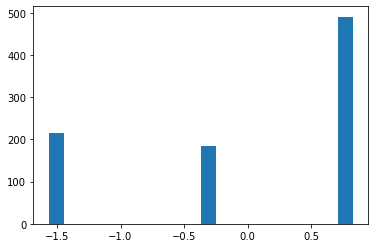

In [157]:
plt.hist(df_scaled.loc[:,1],bins=20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([-0.78927234, -0.68645923, -0.58364612, -0.48083301, -0.37801991,
        -0.2752068 , -0.17239369, -0.06958059,  0.03323252,  0.13604563,
         0.23885873,  0.34167184,  0.44448495,  0.54729805,  0.65011116,
         0.75292427,  0.85573737,  0.95855048,  1.06136359,  1.16417669,
         1.2669898 ]),
 <a list of 20 Patch objects>)

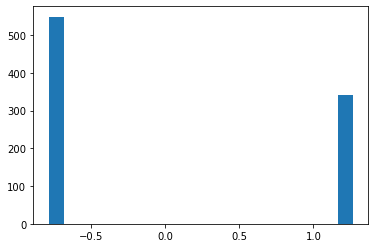

In [158]:
plt.hist(df_scaled.loc[:,0],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

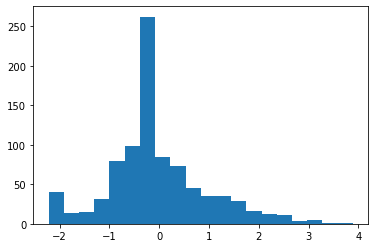

In [159]:
plt.hist(df_scaled.loc[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

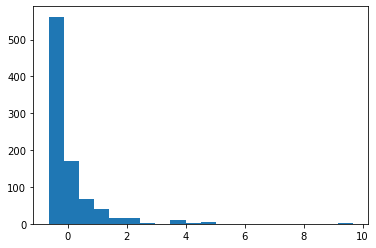

In [160]:
plt.hist(df_scaled.loc[:,3],bins=20)

### 2.  Normalization:- Min Max Scaling (Works well with CNN techniques in deep learning , in ML StandardScaler is more prefered than MinMaxScaler)

Min max scaling is a form of normalization which scales the values between 0 to 1 including 0 and 1.  
Formula used:  
(for scaling between 0 to 1) X_norm = (X-X_min)/(X_max-X_min)

(for scaling between any 2 integers) 
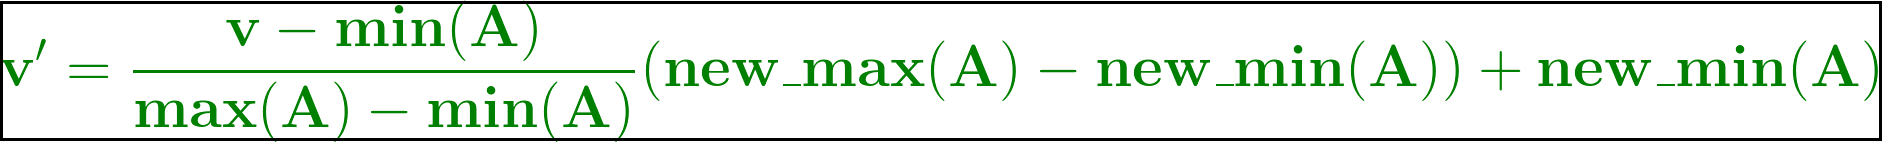

In [161]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [162]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_min_max =pd.DataFrame(min_max.fit_transform(df),columns=df.columns) 

In [163]:
df_min_max.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

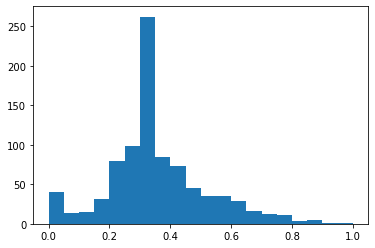

In [164]:
plt.hist(df_min_max['Age'],bins = 20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

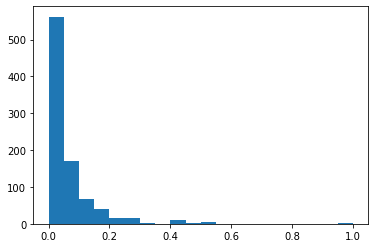

In [165]:
plt.hist(df_min_max['Fare'],bins = 20)

### 3.  RobustScaler: Scaling to median and quantiles  
Used to scale the feature to median and quantiles.  
Scaling using median and quantiles consists of subtracting the median to all the observations and then dividing by the inter-quantile difference.  
*Inter-quantile difference* - is the diff. between the 75th and 25th quantile.  
IQR = 75th quantile - 25th quantile
  
Formula used:-  
X_scaled = (X - X_median) / IQR
  
In Standardisation, sometimes an input variable may have outlier values. These are values on the edge of the distribution that may have a low probability of occurrence, yet are overrepresented for some reason. Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers.  
  
One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.  
  
This is called robust standardization or robust data scaling.  
  
This can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles.  
  
The resulting variable has a zero median and a standard deviation of 1, although not skewed by outliers and the outliers are still present with the same relative relationships to other values.

In [166]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
df_robust = pd.DataFrame(robust.fit_transform(df),columns=df.columns)

In [167]:
df_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

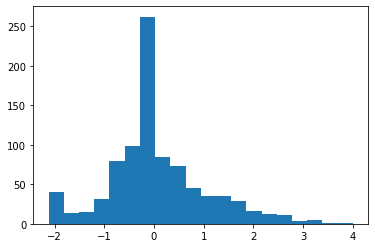

In [168]:
plt.hist(df_robust.Age,bins =20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

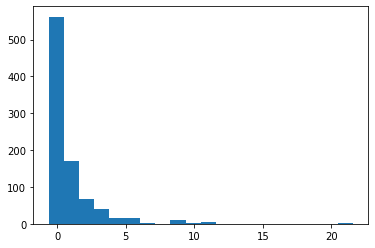

In [169]:
plt.hist(df_robust.Fare,bins =20)

### 4.  Gaussian Transformation
If suppose some features in your dataset is not normally distributed then to make it normally distributed we use different Gaussian Transformation.After applying gaussian trans., we can apply above mentioned techniques to scale down the features.  
  
Like in our example above, Fare feature has a right skewed plot so to make such plots gaussian distributed we can use various gaussian transformation techniques and after that if we want to further scale down the values of that feature we can use methods like Standardisation,MinMaxScaler or RobustScaler.  
  
  Various Gaussian Transformation are:-  
   a. Logarithmic transformation  
   b. Reciprocal transformation  
   c. Squareroot transformation   
   d. Exponential trasformation(more general , you can use any exponent)  
   e. Box Cox transformation  
   f. Yeo-Johnson Transformation
  
Standardisation and Gaussian trans. are not alike , in standardisation we scale the feature at mean 0 and std=1, but in Gaussian transformation we apply different techniques to make a feature normally(gaussian)distributed with mean can be other than zero or std may not be 1. After using Gaussian transformation on some features it may (or may not) also be required to scale down the feature values further and to achieve that we can use Standardization.  
  
Why we use Gaussian Transformation?    
Some ML algorithms like linear,logistic regression ,etc assumes that the features are normally distributed.  
It provides Accuracy and Performance.
  
Using scipy qqplot we can check if a feature is normally distributed or not , if after applying log trans. our feature does not fall on the same line (in qqplot) then we need to transform it by other techniques and every time you apply some gaussian technique you can check with scipy's qqplot if the dist is normal or not. 

In [170]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

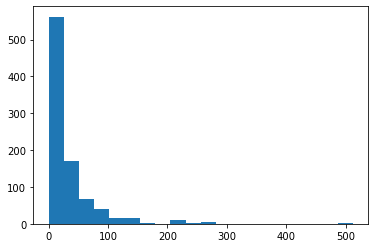

In [171]:
plt.hist(df['Fare'],bins =20)# Right skewed plot , not normally distributed

Directly plotting Age feature :-

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

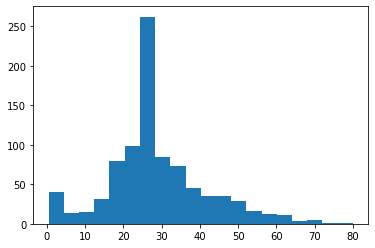

In [172]:
plt.hist(df.Age,bins=20)

Plotting Age feature with logarithic transformation:-

(array([  1.,   1.,   5.,   7.,   0.,  10.,   0.,   6.,  10.,   4.,   6.,
         12.,   7.,  31., 104., 133., 359., 106.,  70.,  19.]),
 array([-0.86750057, -0.60502421, -0.34254785, -0.08007149,  0.18240487,
         0.44488123,  0.70735759,  0.96983395,  1.23231031,  1.49478667,
         1.75726303,  2.01973939,  2.28221575,  2.54469211,  2.80716847,
         3.06964483,  3.33212119,  3.59459755,  3.85707391,  4.11955027,
         4.38202663]),
 <a list of 20 Patch objects>)

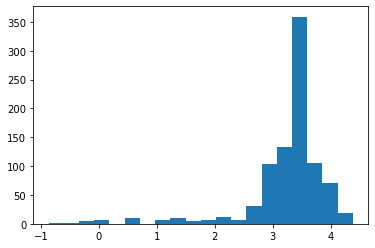

In [173]:
plt.hist(np.log(df.Age),bins=20)

Herw we observe that we are not getting a normally distributed plot for age feature after applying log transformation so we will check using other gaussian transformation techniques.  
  
#### We can also check this by using QQPlot in scipy library.  

In [174]:
import scipy.stats as stat 
import pylab

In [175]:
#### If you want to check whether feature is gaussian or not.
#### Q-Q Plot

def plot_data(df,feature):
    fig = plt.figure(figsize = (8,5))
    plt.subplot(121)
    df[feature].hist()
    plt.subplot(122)
    stat.probplot(df[feature],dist= 'norm',plot = pylab)
    plt.show()
    plt.tight_layout()

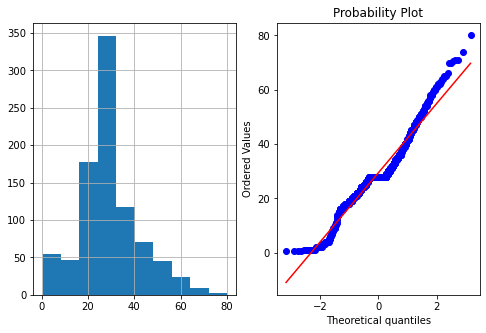

<Figure size 432x288 with 0 Axes>

In [176]:
plot_data(df,'Age')

##### If all the points are falling in the same straight line we can say that this feature is normally distributed.(Here most of them are on the line but we want near perfect results so let's check by applying various gaussian transformations techniques.

Now we will apply some transformations to make this feature normally distributed

### 4.1. Log transformation
We simply take log of a particular feature of which we want normal dist.   
**Log distribution works well when the feature is rightly or left skewed it converts them to normal.**  
Mean(towards the tail) to the right of the median is Right Skewed.  
Mean(towards the tail) to the left of the median is Left Skewed.  
**You should note that this function is defined only for strictly positive numbers.**

In [177]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


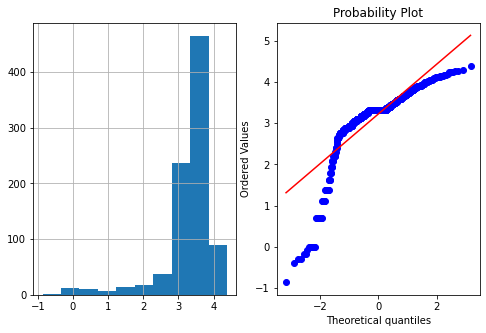

<Figure size 432x288 with 0 Axes>

In [178]:
df['Age_log'] = np.log(df['Age'])
plot_data(df, 'Age_log')

Log transformation definetely did not help with age feature , we will try other tansformations further but first let's see the Fare feature distribution and since it's skewed and log transformation are suitable for such kind of features plots.  


For Fare feature:-

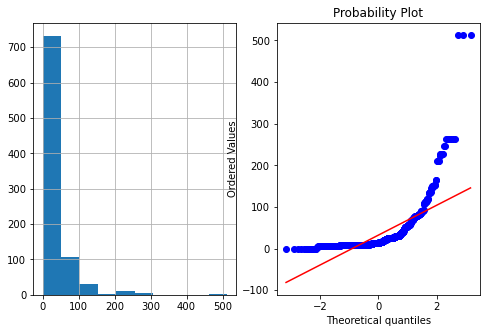

<Figure size 432x288 with 0 Axes>

In [179]:
plot_data(df,'Fare')

C:\Users\Prakash\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


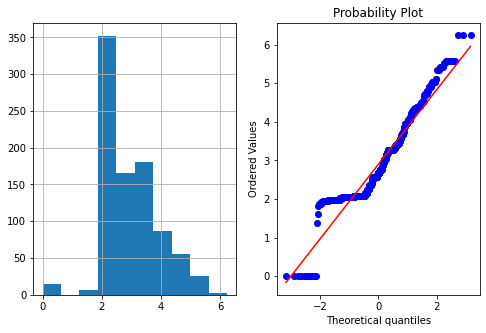

<Figure size 432x288 with 0 Axes>

In [180]:
df['Fare_log'] = np.log(df['Fare'])
df['Fare_log']= np.where(df['Fare_log']== -np.inf,0,df['Fare_log'],)
plot_data(df,'Fare_log')

In [181]:
df.Fare_log.describe()

count    891.000000
mean       2.893846
std        1.002899
min        0.000000
25%        2.068177
50%        2.670985
75%        3.433987
max        6.238967
Name: Fare_log, dtype: float64

In [182]:
df[df['Fare']==0].head()

,Survived,Pclass,Age,Fare,Age_log,Fare_log
179,0,3,36.0,0.0,3.583519,0.0
263,0,1,40.0,0.0,3.688879,0.0
271,1,3,25.0,0.0,3.218876,0.0
277,0,2,28.0,0.0,3.332205,0.0
302,0,3,19.0,0.0,2.944439,0.0


### 4.2. Reciprocal transformation
It is just the reciprocal of the particular feature.  
**You should note that this function is not defined for zero.**

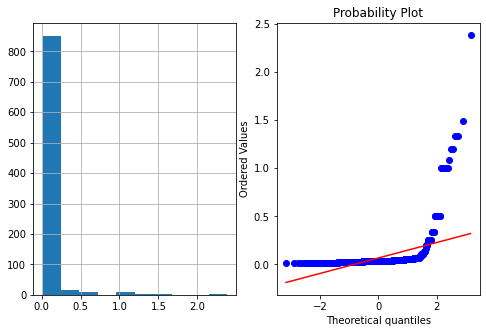

<Figure size 432x288 with 0 Axes>

In [183]:
df['Age_reciprocal'] = 1/ df['Age']
plot_data(df,'Age_reciprocal')

###### Reciprocal Transformation is also not helping, so we try another.

### 4.3. SquareRoot transformation
We just take square root of that particuar feature.  
**You should note that this function is defined only for positive numbers.**


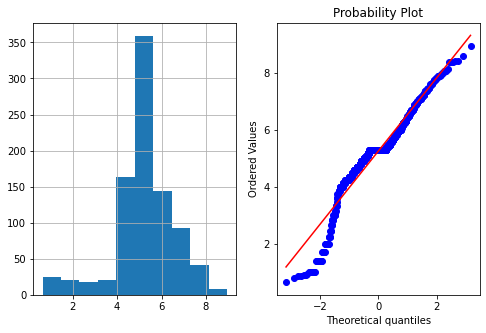

<Figure size 432x288 with 0 Axes>

In [184]:
df['Age_squareroot'] = np.sqrt(df['Age'])
plot_data(df,'Age_squareroot')

Somewhat considerable plot but we will check for other transformations as well

### 4.4. Exponential or Power Transformation
Power transformation has a reasonable effect on distribution shape; generally, we apply power transformation (power of two usually) to reduce left skewness.  
You can use any exponent in this transformation; you can even use the exp() function. Try and see which one gives you better results.

In [185]:
df['Age_expo']= df.Age**(1/1.2)

In [186]:
df.head()

,Survived,Pclass,Age,Fare,Age_log,Fare_log,Age_reciprocal,Age_squareroot,Age_expo
0,0,3,22.0,7.2500,3.091042,1.981001,0.045455,4.690416,13.142729
1,1,1,38.0,71.2833,3.637586,4.266662,0.026316,6.164414,20.724608
2,1,3,26.0,7.9250,3.258097,2.070022,0.038462,5.099020,15.105825
3,1,1,35.0,53.1000,3.555348,3.972177,0.028571,5.916080,19.351889
4,0,3,35.0,8.0500,3.555348,2.085672,0.028571,5.916080,19.351889


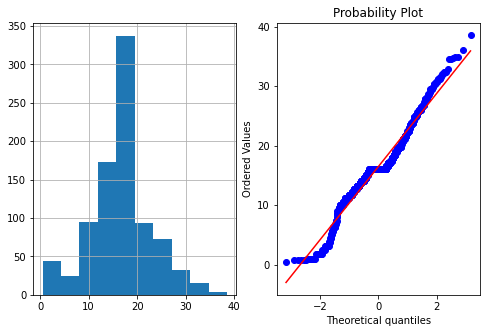

<Figure size 432x288 with 0 Axes>

In [187]:
plot_data(df,'Age_expo')

So far the best fit for all points on the 45 degree line now let's check for some other exponent value. After checking for any value the best fit was above plotted points.

### 4.5. Box-Cox Transformation

More on Box-Cox plot with mathematics interpretation:- https://www.geeksforgeeks.org/box-cox-transformation-using-python/  
Box-Cox is one of the most successful transformations; it’s an **evolution of the exponential transformation**, which looks through various exponents instead of trying them manually.  
By doing Box-Cox transformation, we’re searching and evaluating all the other transformations and choosing the best one.  
  
The exponent here is a variable called lambda (λ) that varies over the range of -5 to 5, and in the process of searching, we examine all values of λ. Finally, we choose the optimal value (resulting in the best approximation to a normal distribution) for your variable.  
  
**You should note that this function is defined only for positive numbers.(i.e x>0)**  
  
                                        Mathematics behind Box-Cox Transformation
How can we convert our intuitive thinking into a mathematical transformation function? Logarithmic transformation is all we need. **When a log transformation is applied to non-normal distribution, it tries to expand the differences between the smaller values because the slope for the logarithmic function is steeper for smaller values whereas the differences between the larger values can be reduced because, for large values, log distribution has a moderate slope.**
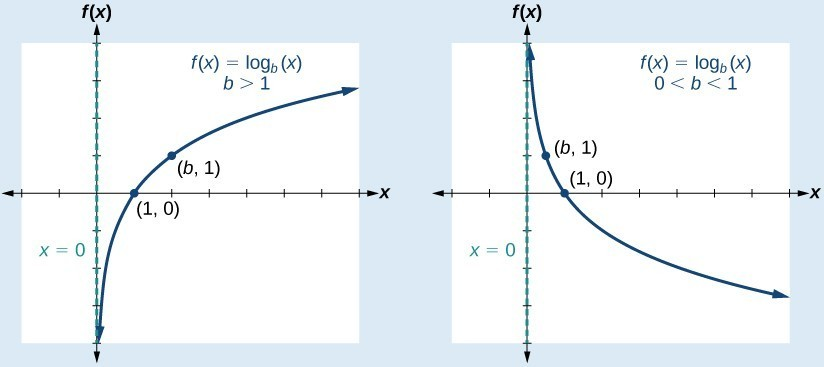  
After applying box-cox to non-normal feature see image below:-  
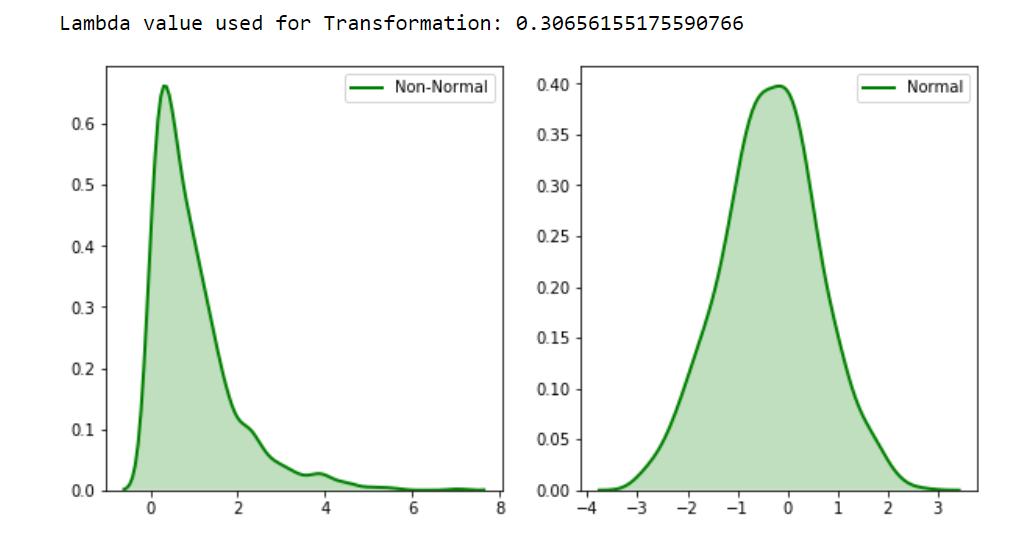

Box-cox Transformation only cares about computing the value of lambda  which varies from – 5 to 5. A value of lambda  is said to be best if it is able to approximate the non-normal curve to a normal curve. The transformation equation is as follows:
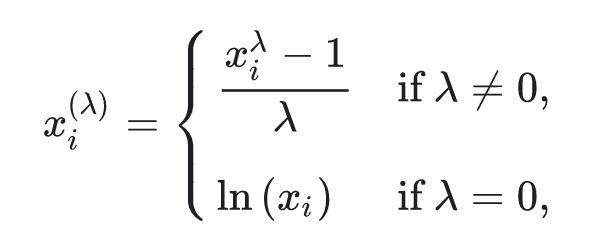  
  
                                             Does Box-cox always work?
The answer is **NO**. Box-cox does not guarantee normality because it never checks for the normality which is necessary to be foolproof that it has correctly transformed the non-normal distribution or not. It only checks for the smallest Standard deviation.

Therefore, it is absolutely necessary to always check the transformed data for normality using probplot in the scipy package.


In [188]:
df.head()

,Survived,Pclass,Age,Fare,Age_log,Fare_log,Age_reciprocal,Age_squareroot,Age_expo
0,0,3,22.0,7.2500,3.091042,1.981001,0.045455,4.690416,13.142729
1,1,1,38.0,71.2833,3.637586,4.266662,0.026316,6.164414,20.724608
2,1,3,26.0,7.9250,3.258097,2.070022,0.038462,5.099020,15.105825
3,1,1,35.0,53.1000,3.555348,3.972177,0.028571,5.916080,19.351889
4,0,3,35.0,8.0500,3.555348,2.085672,0.028571,5.916080,19.351889


Applying Box-Cox to our features in dataframe:-

In [189]:
df['Age_boxcox'],parameter_lambda1 = stat.boxcox(df['Age'])

In [190]:
df.head(),parameter_lambda1

(   Survived  Pclass   Age     Fare   Age_log  Fare_log  Age_reciprocal  \
 0         0       3  22.0   7.2500  3.091042  1.981001        0.045455   
 1         1       1  38.0  71.2833  3.637586  4.266662        0.026316   
 2         1       3  26.0   7.9250  3.258097  2.070022        0.038462   
 3         1       1  35.0  53.1000  3.555348  3.972177        0.028571   
 4         0       3  35.0   8.0500  3.555348  2.085672        0.028571   
 
    Age_squareroot   Age_expo  Age_boxcox  
 0        4.690416  13.142729   13.468119  
 1        6.164414  20.724608   21.498728  
 2        5.099020  15.105825   15.563417  
 3        5.916080  19.351889   20.056110  
 4        5.916080  19.351889   20.056110  ,
 0.7964531473656952)

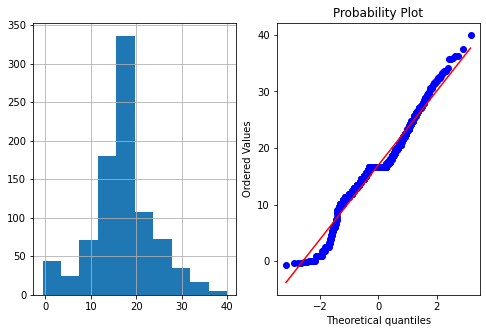

<Figure size 432x288 with 0 Axes>

In [191]:
plot_data(df,'Age_boxcox')

Let's check for Fare feature what this transformation do to a right skewed plot:-

In [192]:
df['Fare_boxcox'],parameter_lambda2 = stat.boxcox(df['Fare']+1)

In [193]:
df.head(),parameter_lambda2

(   Survived  Pclass   Age     Fare   Age_log  Fare_log  Age_reciprocal  \
 0         0       3  22.0   7.2500  3.091042  1.981001        0.045455   
 1         1       1  38.0  71.2833  3.637586  4.266662        0.026316   
 2         1       3  26.0   7.9250  3.258097  2.070022        0.038462   
 3         1       1  35.0  53.1000  3.555348  3.972177        0.028571   
 4         0       3  35.0   8.0500  3.555348  2.085672        0.028571   
 
    Age_squareroot   Age_expo  Age_boxcox  Fare_boxcox  
 0        4.690416  13.142729   13.468119     1.906724  
 1        6.164414  20.724608   21.498728     3.497640  
 2        5.099020  15.105825   15.563417     1.970459  
 3        5.916080  19.351889   20.056110     3.304258  
 4        5.916080  19.351889   20.056110     1.981680  ,
 -0.09778702818680361)

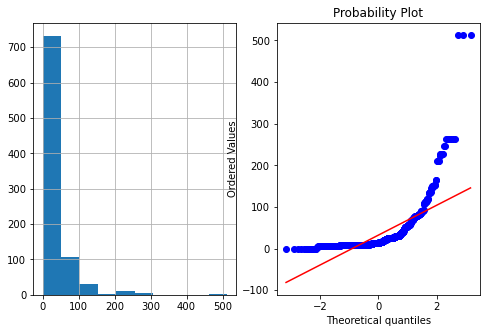

<Figure size 432x288 with 0 Axes>

In [196]:
plot_data(df,'Fare')

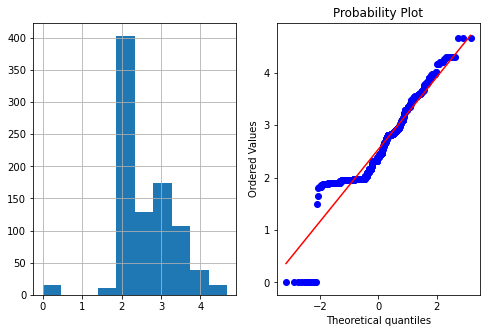

<Figure size 432x288 with 0 Axes>

In [194]:
plot_data(df,'Fare_boxcox')

#### What we should first Standardisation(Scaling) or Transformation?  
First of all check if the feature is normally distributed or not , if it's normally distributed go for Standadisation and if not normally distributed first go for transformation.

### 4.6. Yeo-Johnson Transformation
**This transformation is somewhat of an adjustment to the Box-Cox transformation, by which we can apply it to negative numbers.**   
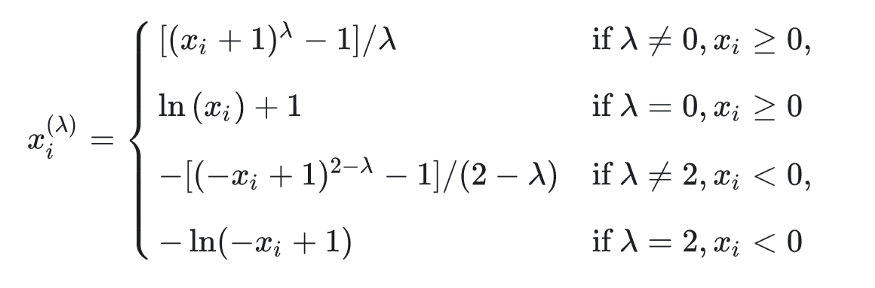


In [197]:
df['Fare_yeo_johnson'],parameter_lambda3 = stat.yeojohnson(df['Fare'])

In [198]:
parameter_lambda3

-0.09778702818680361

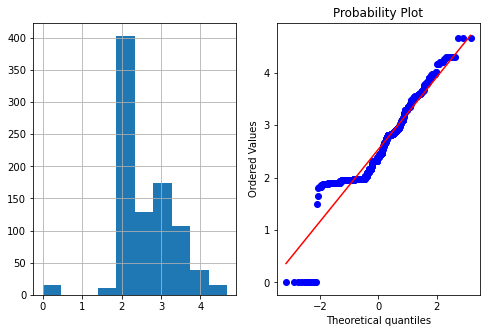

<Figure size 432x288 with 0 Axes>

In [199]:
plot_data(df,'Fare_yeo_johnson')

## Handling Outliers in Datasets and it's impact on ML
  
The first question related to outliers is that, Should we remove outliers in every dataset and problem statement?
The answer is **NO** , because is some cases and in some domains outliers are important like in Credit card fraud detection dataset(here the outliers are itself represnting that this is a fraud transaction and we classify it as fraud) and in some datasets like titanic we can remove outliers because here outliers are not helping us to find anything.  
  
In short ,removing outliers depends on the problem statement and the domain you are working in.  

#### Which ML Models are sensitive to outliers?  
1. Naive Bayes Classifier-------------------- Not Sensitive to outliers  
2. SVM------------------------------------------- Not Sensitive to outliers   
3. Linear Regression------------------------- Sensitive to outliers 
4. Logistic Regression----------------------- Sensitive to outliers 
5. Decision Tree Regressor or Classifier----- Not Sensitive to outliers  
6. Ensemble(XGBoost, Random Forest,GB)------- Not Sensitive to outliers 
7. KNN--------------------------------------- Not Sensitive to outliers
8. K-Means ---------------------------------- Sensitive to outliers  
9. Hierarchical Clustering ------------------ Sensitive to outliers
10. PCA------------------------------------------- Sensitive to outliers
11. Neural Networks--------------------------- Sensitive to outliers


In [202]:
df= pd.read_csv('titanic_train.csv')

In [203]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
df.Age.isnull().sum(),df.shape

(177, (891, 12))

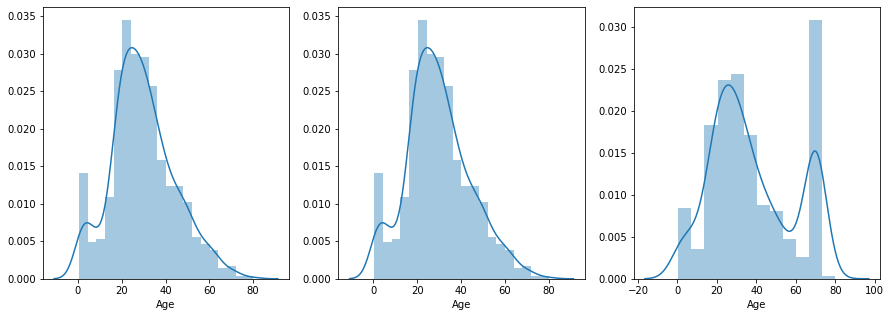

In [218]:
fig = plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(df.Age)
plt.subplot(132)
sns.distplot(df.Age.dropna())
plt.subplot(133)
sns.distplot(df.Age.fillna(70))
plt.show()

If a feature in a dataset is having gaussian dist. then we use different tecniques to deal with the outliers and when we have skewed distribution for some features then other techniques are used to handle the outliers. And we will see how to deal with outliers in both scenarios.  
  
Now let's see for any outliers using histogram in Age feature:-  
  
### Handling Outliers For Gaussian Features:-

Text(0.5, 1.0, 'Age Histogram')

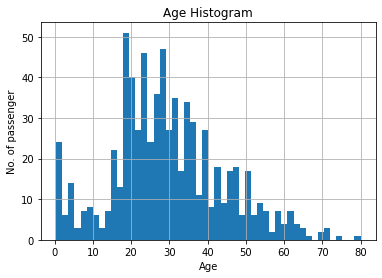

In [220]:
fig = df.Age.hist(bins= 50)
fig.set_xlabel('Age')
fig.set_ylabel('No. of passenger')
fig.set_title('Age Histogram')

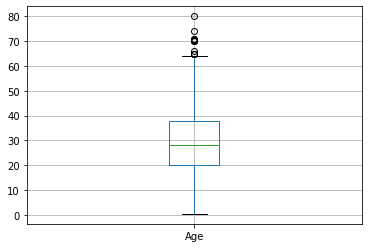

In [222]:
df.boxplot(column='Age')   ## there are some outliers

In [223]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Assuming that the Age feature follows a gaussian distribution we will calculate a boundary beyond which if any point lies that will be considered as an outlier.**  
  
The boundaries that we are going to set will be the 3rd std from the mean beyond which only 5% (approx. 2.5% on left side and 2.5% on the right side of mean) datapoints lie.

In [224]:
upper_boundary = df.Age.mean() + 3*df.Age.std()
lower_boundary = df.Age.mean() - 3*df.Age.std()

In [225]:
upper_boundary,lower_boundary

(73.27860964406095, -13.88037434994331)

In [228]:
df[df.Age>upper_boundary]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


**When a feature is gaussian above method is applied to calculate the upper and lower boundary to eliminate the outliers.**

Now let's see for Skewed Dataset How to calculate the boundary:-  
  
### Handling Outliers For Skewed Features:-   


Beyond **25th quartile - (1.5 * IQR) and 75th quartile + (1.5 * IQR)** values are considered as outliers. 1.5 is just a global constant that can be changed according to the domain you are working in.

Text(0.5, 1.0, 'Age Histogram')

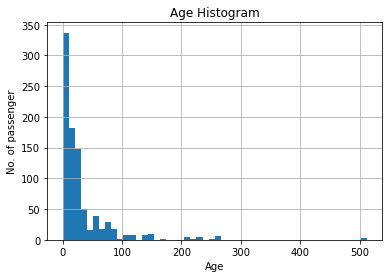

In [236]:
fig = df.Fare.hist(bins= 50)
fig.set_xlabel('Age')
fig.set_ylabel('No. of passenger')
fig.set_title('Age Histogram')

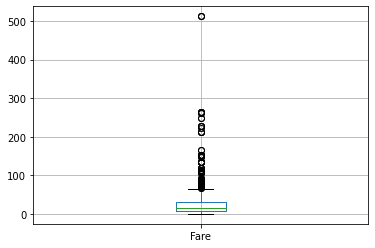

In [237]:
df.boxplot(column='Fare')   ## there are many outliers

In [238]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [246]:
### IQR is InterQuantile Range to calculate the boundary.
IQR = df.Fare.quantile(q=.75) - df.Fare.quantile(q=.25)
upper_bridge = df.Fare.quantile(q=.75) + (1.5*IQR)
lower_bridge = df.Fare.quantile(q=.25) - (1.5*IQR)

lower_bridge,upper_bridge

(-26.724, 65.6344)

In [245]:
#### For only handling extreme outliers (this can be a case in few problem statements) :-
IQR = df.Fare.quantile(q=.75) - df.Fare.quantile(q=.25)
upper_bridge_extreme = df.Fare.quantile(q=.75) + (3*IQR)
lower_bridge_extreme = df.Fare.quantile(q=.25) - (3*IQR)

lower_bridge_extreme,upper_bridge_extreme

(-61.358399999999996, 100.2688)

In [248]:
len(df[df.Fare>upper_bridge_extreme])  ##There are 53 values above the upper boundary

53

#### Finally, after computing the boundary values we will replace all the values greater than the boundary with the boundary value.

In [249]:
data= df.copy()

For Age feature:-

In [250]:
data.loc[data['Age']>=73,'Age'] = 73    ## since the boundary value for the Age col was 73.xxx so we took 73

Text(0.5, 1.0, 'Age Histogram')

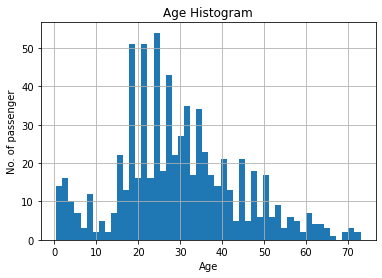

In [251]:
fig = data.Age.hist(bins= 50)
fig.set_xlabel('Age')
fig.set_ylabel('No. of passenger') 
fig.set_title('Age Histogram')     ## now we see the max value is upto 73 only not beyond that therefore outliers eliminated

For Fare feature:-

In [254]:
data.loc[data['Fare']>=100,'Fare'] = 100   ## since the boundary value for the Fare col was 100.xxx so we took 100

Text(0.5, 1.0, 'Fare Histogram')

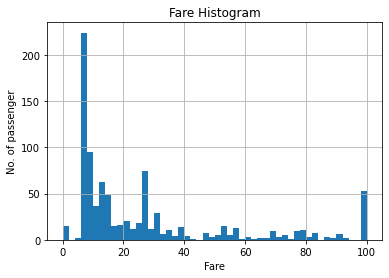

In [257]:
fig = data.Fare.hist(bins= 50)
fig.set_xlabel('Fare')
fig.set_ylabel('No. of passenger') 
fig.set_title('Fare Histogram')       ## now the max val is hundred 

## Feature Selection

In [260]:
df = pd.read_csv('mobile_dataset.csv')

In [261]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [262]:
df.shape

(2000, 21)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [1]:
import math, random,copy

In [2]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
date_base = datetime.datetime.today()

In [9]:
date_list = [date_base - datetime.timedelta(days=x) for x in range(0,20)]

In [14]:
date_df = pd.DataFrame(date_list,columns=['day'])

In [15]:
date_df

,day
0,2021-03-05 02:17:19.958882
1,2021-03-04 02:17:19.958882
2,2021-03-03 02:17:19.958882
3,2021-03-02 02:17:19.958882
4,2021-03-01 02:17:19.958882
5,2021-02-28 02:17:19.958882
6,2021-02-27 02:17:19.958882
7,2021-02-26 02:17:19.958882
8,2021-02-25 02:17:19.958882
9,2021-02-24 02:17:19.958882


In [17]:
date_df['weekdays']= date_df.day.dt.strftime('%A')

In [18]:
date_df

,day,weekdays
0,2021-03-05 02:17:19.958882,Friday
1,2021-03-04 02:17:19.958882,Thursday
2,2021-03-03 02:17:19.958882,Wednesday
3,2021-03-02 02:17:19.958882,Tuesday
4,2021-03-01 02:17:19.958882,Monday
5,2021-02-28 02:17:19.958882,Sunday
6,2021-02-27 02:17:19.958882,Saturday
7,2021-02-26 02:17:19.958882,Friday
8,2021-02-25 02:17:19.958882,Thursday
9,2021-02-24 02:17:19.958882,Wednesday
